## Leaky Integrator ##

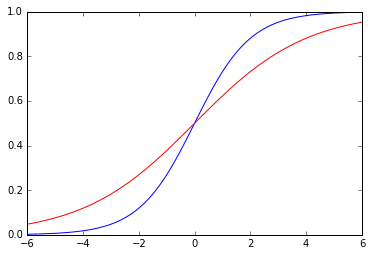

In [1]:
# Inline plotting:
%matplotlib inline

# Leaky integrator model specification
# Componenets:
# - membrane potential m
# - sigmoid function sigma from R -> [0,k) for firing rate
# - firing rate M(time) = sigma(m(time))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

class sigmoid(object):
    def __init__(self,upper_bound,scale): 
        self.upper_bound = upper_bound
        self.scale = scale

    def squash(self,value):
        output = self.upper_bound/(1 + np.exp(-value/self.scale))
        return output

    
# Define some things and plot this function
unit_squasher = sigmoid(1,1)
long_squasher = sigmoid(1,2)

x_vals = np.linspace(-6, 6, 100)
y1_vals = unit_squasher.squash(x_vals)
y2_vals = long_squasher.squash(x_vals)

plt.plot(x_vals,y1_vals,'b'
        ,x_vals,y2_vals,'r')


# Linear Models #


Result of fitting one dim. polynomial with numpy.polyfit and std=10:

    coeff: [  4.2453875  -13.86515031  32.75781573]
residuals: [ 1982.91835056]
     rank: 3
 singular: [ 1.67459129  0.43902844  0.05475443]
    rcond: 1.7763568394e-15
    covar: 
[[   62.94978891  -346.22383899   393.43618067]
 [ -346.22383899  1967.18090334 -2337.01091316]
 [  393.43618067 -2337.01091316  3017.65550572]]
 
Data and Fit:


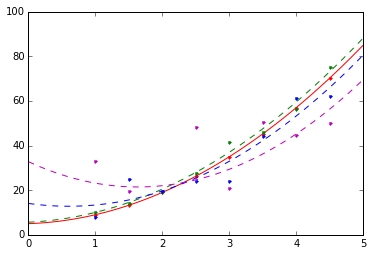

In [56]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Define a quadratic function
def noisy_quadratic(x,a,std):
    # Random normal disallows degenerate case of std = 0.
    if std <= 0.:
        std = 0.0000001
        
    y = a[0] + a[1]*x + a[2]*x**2 + np.random.normal(0,std,len(x))
    return y

# Define an independent variable 'x', coefficients for quadratic 'a'
x = np.arange(1.,5.,0.5)
a = np.array([5,1,3])

# Generate a dependent variable. 
# Our data set is now {(x,y)}
y           = []
coeff       = []
response_fn = []
for ind in range(0,4):
    std = ind*5.
    y.append(noisy_quadratic(x,a,std))

    # Use internal numpy to fit data and recover the coefficient vector 'a'
    param, residuals, rank, singular_values, rcond = np.polyfit(x, y[-1], 2, rcond=None, full=True, w=None)
    param, covar = np.polyfit(x, y[-1], 2, rcond=None, full=False, w=None, cov=True)
    coeff.append(param)
    
    # Use the recovered quadratic to approximate the real one
    response_fn.append(np.poly1d(coeff[ind]))


print ''
print 'Result of fitting one dim. polynomial with numpy.polyfit and std=10:'
print ''
print '    coeff: ' + str(coeff[-1])
print 'residuals: ' + str(residuals)
print '     rank: ' + str(rank)
print ' singular: ' + str(singular_values)
print '    rcond: ' + str(rcond)
print '    covar: '
print covar
print ' '

# Plot the data and the fit.
# # x is in (0,10) and y is in (0,270) so we'll set these as lims
xp = np.linspace(0, 5, 100)
plt.plot(x ,               y[0], '.r',
         xp, response_fn[0](xp), '-r',
         x ,               y[1],  '.g',
         xp, response_fn[1](xp), '--g',
         x ,               y[2],  '.b',
         xp, response_fn[2](xp), '--b',
         x ,               y[3],  '.m',
         xp, response_fn[3](xp), '--m')

plt.ylim(0,100)

print 'Data and Fit:'
plt.show()

# Matrix Algebra $v^T X v$ #

An aside/refresher on matrix algebra concerning the form v^t * X * v  
This form is the projection of T(v) onto v, * norm(v)^2 where T is the transformation represented by X

transformed  e1 : [ 1.41421356 -0.35355339]
proj tf onto e1 : [ 1.41421356  0.        ]
proj tf onto e2 : [-0.         -0.35355339]
proj e1 onto tf : [ 0.94117647 -0.23529412]


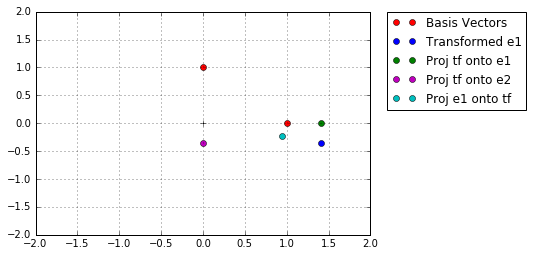

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

# Define and plot basis vectors
e_1 = np.array([1,0])
e_2 = np.array([0,1])

plt.plot(e_1,e_2,'or',label='Basis Vectors')

# Define a positive-definite transform matrix as mock covariance matrix
theta = 1/4 *math.pi
X = np.array([[   2*math.cos(theta), 0.5*math.sin(theta)],
              [-0.5*math.sin(theta),     math.cos(theta)]])

# Get transform of e_1, and find projections...
# Recall projection of b onto a is dot(b,a) /(|a|^2) *a
tform    = np.dot(X,e_1)
proj_e1  = np.dot(e_1,tform) *e_1 
proj_e2  = np.dot(e_2,tform) *e_2
proj_tf  = np.dot(e_1,tform) *tform /np.linalg.norm(tform)**2

# Display values
print('transformed  e1 : ' + str(tform))
print('proj tf onto e1 : ' + str(proj_e1))
print('proj tf onto e2 : ' + str(proj_e2))
print('proj e1 onto tf : ' + str(proj_tf))

# Plot all this stuff
plt.plot(tform  [0],tform  [1],'ob', label='Transformed e1')
plt.plot(proj_e1[0],proj_e1[1],'og', label='Proj tf onto e1')
plt.plot(proj_e2[0],proj_e2[1],'om', label='Proj tf onto e2')
plt.plot(proj_tf[0],proj_tf[1],'oc', label='Proj e1 onto tf')
plt.plot(0,0,'+k')

# Set up and show plot
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()